In [1]:
# find 3 points on 

phi = (1 + 5 ** 0.5) / 2

def zeta(p):
    s = [x / phi for x in p]
    if abs(s[2] - 1) < 1e-16:
        return complex('inf')
    return (s[0] + s[1] * 1j) / (1 - s[2])

# points: all permutations of
# (0, 0, ±φ), (±1/2,±φ/2, ±φ**2/2)

# phi**2 = phi + 1

# p1 = (0, 0, phi)
# p2 = (1/2, phi**2/2, -phi/2)
# p3 = (-1/2, -phi**2/2, -phi/2)

p1 = (1/2, phi/2, phi**2/2)
p2 = (phi/2, -phi**2/2, -1/2)
p3 = (-phi**2/2, 1/2, -phi/2)

In [2]:
zeta(p1)
#, zeta(p1) * zeta([-x for x in p1]).conjugate()

(1.618033988749895+2.6180339887498953j)

In [3]:
zeta(p2)

(0.38196601125010515-0.6180339887498949j)

In [4]:
zeta(p3)

(-0.5393446629166316+0.20601132958329826j)

In [5]:
print(p1[0]+p2[0]+p3[0], p1[1]+p2[1]+p3[1], p1[2]+p2[2]+p3[2])

0.0 0.0 0.0


In [12]:
def f29z(z):
    nom = 1 + z**5 * (-435 + z**5 * (-6670 + z**10 * (-3335 + z**5 * 87)))
    denom = z**4 * (87 + z**5 * (3335 + z**10 * (6670 + z**5 * (-435 - z**5))))
    if abs(denom) < 1e-16:
        return complex('inf')
    return nom / denom

def belyi(z):
#     nom = -6912 * (z**20 + 228 * z**15 + 494 * z**10 - 228 * z**5 + 1)**3 * (z**11 - 11 * z**6 - z)**5
#     denom = (z**30 - 522 * z**25 - 10005 * z**20 - 10005 * z**10 + 522 * z**5 + 1)**4

#     nom = -6912 * (z**20 + 228 * z**15 + 494 * z**10 - 228 * z**5 + 1)**3 * (z**11 - 11 * z**6 - z)**5
    denom = (z**30 - 522 * z**25 - 10005 * z**20 - 10005 * z**10 + 522 * z**5 + 1)
    if abs(denom) < 1e-16:
        return complex('inf')

    nom1 = -6912 * (z**20 + 228 * z**15 + 494 * z**10 - 228 * z**5 + 1) * (z**11 - 11 * z**6 - z) / denom
    nom2 = (z**20 + 228 * z**15 + 494 * z**10 - 228 * z**5 + 1) * (z**11 - 11 * z**6 - z) / denom
    nom3 = (z**11 - 11 * z**6 - z)**2 / denom
    return nom1 * nom2 * nom2 * nom3

def f_mix_op(z):
    return z + 1/(z.conjugate())

def test_op_f(z):
    y = f_mix_op(z)
    return y

def icos1(z):
    return (-z**29 - 435 * z**24 + 6670 * z**19 + 3335 * z**9 + 87 * z**4)/(87 * z**25 - 3335 * z**20 - 6670 * z**10 - 435 * z**5 + 1)

def icos2(z):
    return icos1(z.conjugate())

In [14]:
z1 = zeta(p1)
z1p = zeta([-x for x in p1])
print(test_op_f(z1), test_op_f(z1p))
z1 = zeta(p1)
z2 = zeta(p2)
z3 = zeta(p3)
print(test_op_f(z1)+test_op_f(z2)+test_op_f(z3))

(1.7888543819998317+2.894427190999916j) (-1.7888543819998317-2.894427190999916j)
(0.7370485393333892+1.9296181273332773j)


In [252]:
z1 = zeta(p1)
z1p = zeta([-x for x in p1])
print(f29z(z1), belyi(z1))
z2 = zeta(p2)
print(f29z(z2), belyi(z2)) # belyi(z2) is real here !?
z3 = zeta(p3)
print(f29z(z3), belyi(z3))
print('')
print(f29z(z1), belyi(z1))
print(f29z(z1p), belyi(z1p))
print(f29z(z1)+f29z(z1p))
print(belyi(z1)+belyi(z1p))
print('')
print(icos1(z1), icos1(z1p))
print(icos1(z1)+icos1(z1p))

(-0.08591469086251022-0.42135626030116596j) (1.1583309601337444-6.145379780329542j)
(-0.6010383077342293+1.563422508485476j) (0.9523705854775587-3.191891195797325e-16j)
(1.254514513333309-0.9883615497762582j) (-1.1092829457573192-0.3413109831304467j)

(-0.08591469086251022-0.42135626030116596j) (1.1583309601337444-6.145379780329542j)
(0.46459853377405863+2.278556772621349j) (1.1583309601337417+6.1453797803295185j)
(0.37868384291154844+1.8572005123201831j)
(2.316661920267486-2.3092638912203256e-14j)

(-0.4645985337740587+2.27855677262135j) (0.0859146908625103-0.421356260301166j)
(-0.3786838429115484+1.857200512320184j)


In [152]:
print(f29z(-1 / z1.conjugate()), -1 / f29z(z1).conjugate())
print(belyi(-1 / z1.conjugate()), belyi(z1).conjugate())

(0.4645985337740592+2.27855677262135j) (0.4645985337740586+2.27855677262135j)
(1.1583309601337408+6.145379780329524j) (1.1583309601337444+6.145379780329542j)


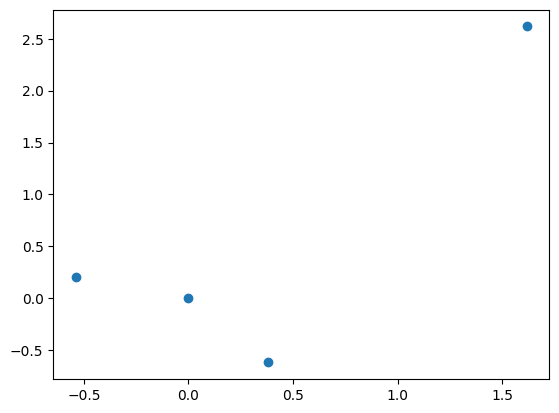

In [153]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([0+0j, z1, z2, z3])
# a = np.array([0+0j, f29z(z1), f29z(z2), f29z(z3)])
fig, ax = plt.subplots()
ax.scatter(a.real, a.imag)

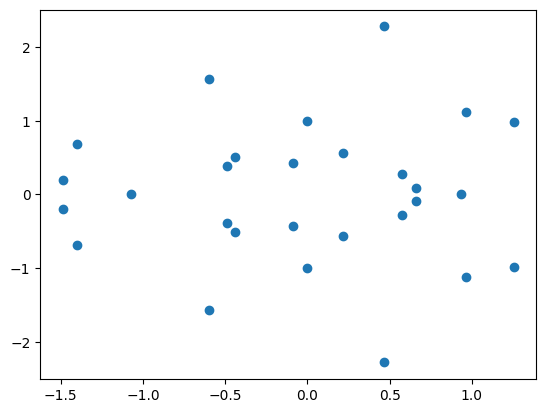

In [158]:
# points: all permutations of
# (0, 0, ±φ), (±1/2,±φ/2, ±φ**2/2)

# phi**2 = phi + 1

# p1 = (0, 0, phi)
# p2 = (1/2, phi**2/2, -phi/2)
# p3 = (-1/2, -phi**2/2, -phi/2)

EPS = 1e-8

def same(a, b):
    return abs(a - b) < EPS

def cyclic_permutations(points):
    new_points = []
    for p in points:
        new_points.append(p)
        new_points.append([p[1], p[2], p[0]])
        new_points.append([p[2], p[0], p[1]])
    return new_points

def all_permutations(points):
    new_points = []
    for p in points:
        new_points.extend(cyclic_permutations([p]))
        new_points.extend(cyclic_permutations([[p[1], p[0], p[2]]]))
    return new_points

def plus_minus(points):
    new_points = []
    for p in points:
        mults = []
        for i in range(len(p)):
            if same(p[i], 0):
                mults.append([1])
            else:
                mults.append([1, -1])
        for i in mults[0]:
            for j in mults[1]:
                for k in mults[2]:
                    new_points.append([p[0] * i, p[1] * j, p[2] * k])
    return new_points

def conf1(points):
    return plus_minus(cyclic_permutations(points))

a, b, c = 0.5, phi / 2, (1.0 + phi) / 2
points = conf1([[a, b, c]])
points.extend(conf1([[0.0, 0.0, phi]]))

arr = np.array([f29z(zeta(p)) for p in points])
# arr = np.array([belyi(zeta(p)) for p in points])
fig, ax = plt.subplots()
ax.scatter(arr.real, arr.imag)
# [belyi(zeta(p)) for p in points]

nroots 30
(0.22982477421268308-0.16697747245472522j)
(0.17228825835288666-0.5302487364854589j)
(-0.08778524986454288-0.27017522679072753j)
(-0.9510565162968687-0.3090169943913792j)
(-0.08778525167120506+0.2701752260056597j)
(0.22982477390490505+0.16697747569648386j)
(-0.45105651628983373+0.3277117417995045j)
(0.9510565162951465-0.30901699437499275j)
(-0.45105651629508076-0.32771174162243966j)
(-0.28407904384043-5.860483426732055e-15j)
(1.0877852522924667+3.3478587629625722j)
(-0.587785252292573-0.8090169943744765j)
(-0.5542542696277527+1.705819241042374j)
(3.520147021789543+6.815535022494026e-11j)
(0.17228825899336003+0.530248733154614j)
(0.9510565162951601+0.3090169943749536j)
(-1.7936044905965247+3.5061081126602257e-09j)
(-0.951056516295155+0.30901699437494545j)
(-0.5542542696277527-1.705819241042374j)
(-0.5877852522925728+0.8090169943744765j)
(1.0877852522924667-3.3478587629625722j)
(0.557536518432293-1.638774618684253e-09j)
(2.1397018889583967e-13+0.9999999999998664j)
(1.3758731141

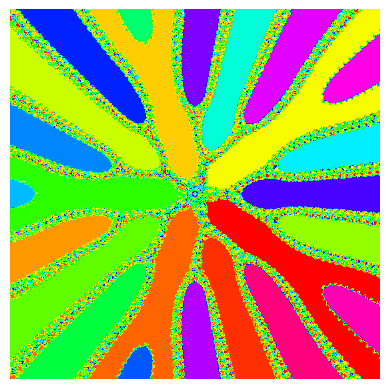

In [197]:
# Newton fractals
# https://scipython.com/book2/chapter-8-scipy/examples/the-newton-fractal/

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000, tol=TOL):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-2, 2, -2, 2)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    print('nroots', nroots)
    for r in roots:
        print(r)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()
    return roots

# f = lambda z: z**4 - 1
# fprime = lambda z: 4*z**3

f = lambda z: z**30 - 522 * z**25 - 10005 * z**20 - 10005 * z**10 + 522 * z**5 + 1
fprime = lambda z: 30 * z**4 * (z**25 - 435*z**20 - 6670*z**15 - 3335*z**5 + 87)

roots = plot_newton_fractal(f, fprime, n=500)

In [230]:
# (0.9510565210799451-0.30901699477540606j)
# (0.5575365155264245+1.4027476314490975e-09j)
# (0.9510565162951554+0.3090169943749498j)
# (0.2298247742127193+0.1669774724548567j)
# (0.5877852605331466+0.8090169995408931j)
# (0.17228825837945416+0.5302487363571261j)
# (-0.08778525229017986+0.2701752257883555j)
# (-0.4510565161505485+0.32771174172059303j)
# (-0.2840790438405676-1.0223591746348733e-12j)
# (-0.45105652294066984-0.3277117430779839j)
# (-1.7936044932701518-6.956658812586874e-10j)
# (-0.08778525233415149-0.27017522589119836j)
# (0.2298247741897591-0.16697747238462837j)
# (0.17228826208576611-0.5302487388818323j)
# (-0.5877852522924575-0.8090169943749476j)
# (1.4510565144353167-1.0542542689606953j)
# (-0.951056516521299-0.3090169943864089j)
# (-0.554254269653206+1.7058192410454127j)
# (1.4510565162191191+1.0542542698038253j)
# (-7.117808402225999e-10-0.9999999991107283j)
# (-7.117807964309965e-10+0.9999999991107285j)
# (0.5877852522935381-0.8090169943784447j)
# (-0.554254269653206-1.7058192410454127j)
# (-0.9510565162953827+0.3090169943748713j)
# (-0.5877852522924575+0.8090169943749476j)
# (-2.8478587629642087-2.069090505045449j)
# (-2.8478587629625585+2.069090505045061j)
# (1.0877852523038924-3.3478587629890977j)
# (1.0877852528371845+3.3478587644586635j)
# (3.520147021265288+1.0870336631265854e-10j)

def stereo(p):
    x = p.real
    y = p.imag
    denom = 1 + x ** 2 + y ** 2
    s0 = 2*x/denom
    s1 = 2*y/denom
    s2 = (x**2+y**2-1)/denom
    assert (abs(s0**2+s1**2+s2**2 - 1) < 1e-8)
    return (s0, s1, s2)

for r in roots:
    s = stereo(r)
    print([f"{k:g}" for k in s])

['0.425325', '-0.309017', '-0.850651']
['0.262866', '-0.809017', '-0.525731']
['-0.16246', '-0.5', '-0.850651']
['-0.951057', '-0.309017', '6.70886e-12']
['-0.16246', '0.5', '-0.850651']
['0.425325', '0.309017', '-0.850651']
['-0.688191', '0.5', '-0.525731']
['0.951057', '-0.309017', '7.32747e-15']
['-0.688191', '-0.5', '-0.525731']
['-0.525731', '-1.08457e-14', '-0.850651']
['0.16246', '0.5', '0.850651']
['-0.587785', '-0.809017', '-3.22298e-13']
['-0.262866', '0.809017', '0.525731']
['0.525731', '1.01789e-11', '0.850651']
['0.262866', '0.809017', '-0.525731']
['0.951057', '0.309017', '8.10463e-15']
['-0.850651', '1.66284e-09', '0.525731']
['-0.951057', '0.309017', '7.77156e-16']
['-0.262866', '-0.809017', '0.525731']
['-0.587785', '0.809017', '-3.22353e-13']
['0.16246', '-0.5', '0.850651']
['0.850651', '-2.50033e-09', '-0.525731']
['2.1397e-13', '1', '-1.3356e-13']
['1.37587e-11', '-1', '-4.98668e-11']
['0.587785', '0.809017', '1.31704e-09']
['0.688191', '0.5', '0.525731']
['0.688191

In [231]:
def get_root(z0, f, fprime, roots):
    def get_root_index(roots, r):
        return np.where(np.isclose(roots, r, atol=TOL))[0][0]

    r = newton(z0, f, fprime)
    if r is not False:
        ir = get_root_index(roots, r)
        return ir, roots[ir], stereo(roots[ir])
    return None

print(p1[0]+p2[0]+p3[0], p1[1]+p2[1]+p3[1], p1[2]+p2[2]+p3[2])
z1 = zeta(p1)
z2 = zeta(p2)
z3 = zeta(p3)
print(get_root(z1, f, fprime, roots))
print(get_root(z2, f, fprime, roots))
print(get_root(z3, f, fprime, roots))

pp1 = [-x for x in p1]
pp2 = [-x for x in p2]
pp3 = [-x for x in p3]
print(pp1[0]+pp2[0]+pp3[0], pp1[1]+pp2[1]+pp3[1], pp1[2]+pp2[2]+pp3[2])
zp1 = zeta(pp1)
zp2 = zeta(pp2)
zp3 = zeta(pp3)
print(get_root(zp1, f, fprime, roots))
print(get_root(zp2, f, fprime, roots))
print(get_root(zp3, f, fprime, roots))

# print()
# for root in roots:
#     print(get_root(root+1j, f, fprime, roots))

0.0 0.0 0.0
(24, (0.587785253832912+0.8090169948836996j), (0.5877852530587774, 0.8090169938181947, 1.3170364781407702e-09))
(2, (-0.08778524986454288-0.27017522679072753j), (-0.1624598436057763, -0.5000000018033246, -0.8506508081535351))
(14, (0.17228825899336003+0.530248733154614j), (0.2628655576588465, 0.8090169913665234, -0.5257311159489825))
0.0 0.0 0.0
(2, (-0.08778524986454288-0.27017522679072753j), (-0.1624598436057763, -0.5000000018033246, -0.8506508081535351))
(19, (-0.5877852522925728+0.8090169943744765j), (-0.5877852522927624, 0.8090169943747373, -3.2235325520001815e-13))
(7, (0.9510565162951465-0.30901699437499275j), (0.9510565162951395, -0.3090169943749905, 7.32747196252598e-15))


In [232]:
triple_count = 0
for r1_idx in range(len(roots)):
    s1 = stereo(roots[r1_idx])
    for r2_idx in range(r1_idx + 1, len(roots)):
        s2 = stereo(roots[r2_idx])
        for r3_idx in range(r2_idx + 1, len(roots)):
            s3 = stereo(roots[r3_idx])
            s_sum = (s1[0] + s2[0] + s3[0], s1[1] + s2[1] + s3[1], s1[2] + s2[2] + s3[2])
#             print(r1_idx, r2_idx, r3_idx, s_sum)
            if (max(abs(s_sum[0]), abs(s_sum[1]), abs(s_sum[2])) < 1e-8):
                triple_count += 1
print(triple_count)

20


In [242]:
import math

for r1_idx in range(len(roots)):
    s1 = stereo(roots[r1_idx])
    min_dist = None
    neighbours = []
    for r2_idx in range(len(roots)):
        if r2_idx == r1_idx:
            continue
        s2 = stereo(roots[r2_idx])
        mult = s1[0] * s2[0] + s1[1] * s2[1] + s1[2] * s2[2]
        mult = max(min(mult, 1), -1)
        cur_dist = math.acos(mult)
        if min_dist is None:
            min_dist = cur_dist
        if cur_dist < min_dist - 1e-6:
            min_dist = cur_dist
            neighbours = []
        if abs(min_dist - cur_dist) < 1e-6:
            neighbours.append(r2_idx)
    print(r1_idx, neighbours)

0 [1, 2, 5, 21]
1 [0, 2, 23, 27]
2 [0, 1, 8, 9]
3 [8, 11, 16, 17]
4 [5, 6, 9, 14]
5 [0, 4, 14, 21]
6 [4, 9, 17, 19]
7 [15, 21, 26, 27]
8 [2, 3, 9, 11]
9 [2, 4, 6, 8]
10 [12, 13, 25, 29]
11 [3, 8, 18, 23]
12 [10, 19, 22, 29]
13 [10, 20, 25, 26]
14 [4, 5, 22, 24]
15 [7, 21, 24, 25]
16 [3, 17, 28, 29]
17 [3, 6, 16, 19]
18 [11, 20, 23, 28]
19 [6, 12, 17, 22]
20 [13, 18, 26, 28]
21 [0, 5, 7, 15]
22 [12, 14, 19, 24]
23 [1, 11, 18, 27]
24 [14, 15, 22, 25]
25 [10, 13, 15, 24]
26 [7, 13, 20, 27]
27 [1, 7, 23, 26]
28 [16, 18, 20, 29]
29 [10, 12, 16, 28]


/var/folders/20/t9hqw_p57nx3ml8gsrzb5zxc0000gn/T/ipykernel_14163/2128844173.py:2: RuntimeWarning: overflow encountered in scalar multiply
  fprime = lambda z: (-348 * z**3 * (-1 + 11 * z**5 + z**10)**3 * (1 + 228 * z**5 + 494 * z**10 - 228 * z**15 + z**20))/(1 - 435 * z**5 - 6670 * z**10 - 3335 * z**20 + 87 * z**25)**2
/var/folders/20/t9hqw_p57nx3ml8gsrzb5zxc0000gn/T/ipykernel_14163/2128844173.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  fprime = lambda z: (-348 * z**3 * (-1 + 11 * z**5 + z**10)**3 * (1 + 228 * z**5 + 494 * z**10 - 228 * z**15 + z**20))/(1 - 435 * z**5 - 6670 * z**10 - 3335 * z**20 + 87 * z**25)**2
/var/folders/20/t9hqw_p57nx3ml8gsrzb5zxc0000gn/T/ipykernel_14163/2128844173.py:2: RuntimeWarning: overflow encountered in scalar power
  fprime = lambda z: (-348 * z**3 * (-1 + 11 * z**5 + z**10)**3 * (1 + 228 * z**5 + 494 * z**10 - 228 * z**15 + z**20))/(1 - 435 * z**5 - 6670 * z**10 - 3335 * z**20 + 87 * z**25)**2
/var/folders/20/t9hqw_p57nx3ml8gsrz

nroots 49
(-1.3879187193169547-1.0083819737460644j)
(2.745155354247534-1.9944721138101116j)
(-0.4821327840501278+7.204050165321335e-12j)
(-1.0485560426808092-3.2271236703070048j)
(2.745155358654162+1.9944721140440576j)
(-1.0485560426069847+3.2271236701371446j)
(-3.393198632094404-4.2266063270191473e-13j)
(0.5301377805151445-1.6315963056851808j)
(1.7155618829573551+5.832352991101024e-10j)
(-0.8875565486907385-0.28748677548690393j)
(-0.14898722379494647-0.4585355259252799j)
(-1.387918718146001+1.0083819713672382j)
(-3.660934653311537e-08+6.164807301243242e-09j)
(-2.6159254871615237e-08-2.686900409345003e-08j)
(-1.0709652319080198e-08-3.466462528691628e-08j)
(-3.563243746279701e-08-4.03478319947107e-09j)
(-0.0008538854794715492-0.932954740497608j)
(-0.5476862296570525-0.7552781413381884j)
(0.5301377767778198+1.6315963080238163j)
(-0.8875565504804204+0.2874867764432737j)
(1.1503522486601203e-08-3.237334916102595e-08j)
(3.367247349502004e-08+1.2236865796307796e-08j)
(0.3900536172757498+0.28

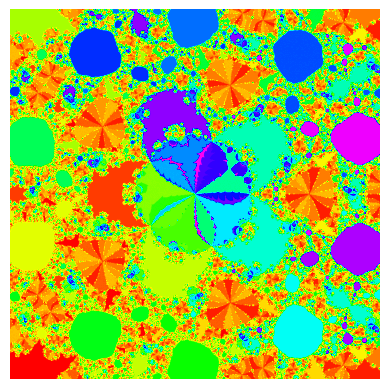

In [246]:
f = lambda z: (-z**29 - 435 * z**24 + 6670 * z**19 + 3335 * z**9 + 87 * z**4)/(87 * z**25 - 3335 * z**20 - 6670 * z**10 - 435 * z**5 + 1)
fprime = lambda z: (-348 * z**3 * (-1 + 11 * z**5 + z**10)**3 * (1 + 228 * z**5 + 494 * z**10 - 228 * z**15 + z**20))/(1 - 435 * z**5 - 6670 * z**10 - 3335 * z**20 + 87 * z**25)**2

roots2 = plot_newton_fractal(f, fprime, n=1000, domain=(-1, 1, -1, 1))

In [245]:
triple_count2 = 0
for r1_idx in range(len(roots2)):
    s1 = stereo(roots2[r1_idx])
    for r2_idx in range(r1_idx + 1, len(roots2)):
        s2 = stereo(roots2[r2_idx])
        for r3_idx in range(r2_idx + 1, len(roots2)):
            s3 = stereo(roots2[r3_idx])
            s_sum = (s1[0] + s2[0] + s3[0], s1[1] + s2[1] + s3[1], s1[2] + s2[2] + s3[2])
#             print(r1_idx, r2_idx, r3_idx, s_sum)
            if (max(abs(s_sum[0]), abs(s_sum[1]), abs(s_sum[2])) < 1e-8):
                triple_count2 += 1
print(triple_count2)

0
